# **THERMAL MODEL OF A SIMPLE GEOMETRY**

# **Table of Contents**
* [Introduction](#Introduction)
* [Chapter 1 - Building description](#Chapter_1)
   * [Section 1.1 - Models](#Section_1.1)
    * [Section 1.2 - Mathematical model](#Section_1.2)
* [Chapter 2 - Initial model and variants](#Chapter_2)
    * [Section 2.1 - Initial Modelisation](#Section_2.1)
    * [Section 2.2 - Variante 1:  Width of the insulation](#Section_2.2)
    * [Section 2.3 - Variante 2: Long wave absortivity in concrete](#Section_2.3)
    * [Section 2.4 - Variante 3: Length of walls](#Section_2.4)
    * [Section 2.5 - Variante 4: Neglect thermal capacity of the glass](#Section_2.5)
    * [Section 2.6 - Variante 5: Neglect thermal capacities of the glass and the air](#Section_2.6)
    * [Section 2.7 - Conclusion chapter 2](#Section_2.7)
* [Chapter 3 - Inputs and simulation](#Chapter_2)
    * [Section 3.1 - Initial Simulation](#Section_3.1)
    * [Section 3.2 - Impacts of the chosen period](#Section_3.2)
    * [Section 3.3 - Schedule the auxiliary heat sources](#Section_3.3)
    * [Section 3.4 - Impact of the controller](#Section_3.4)
        * [Section 3.4.1 - Winter](#Section_3.4.1)
        * [Section 3.4.2 - Summer](#Section_3.4.1)
* [Conclusion](#Conclusion)
* [List of references](#References)

## Introduction

The following project consists of creating a simulation tool using Python for a dynamic model of thermic energy in building energy management. In this case, our model is a simple building. It is actually a cube with four walls, a roof and a floor just like a simple box. The cube is 3 meters large by 3 meters long by 3 meters high for a total of 9 square meters floor and a volume of 27 cube meters. The walls are made of concrete which has a thickness of 0,2 meter. Inside the building on each wall, it is possible to find insulation thick of 0,08 meter. Also, there is also a glass of 1 meter by 2 meters on one of the walls.  

## Chapter 1 - Models  <a class="anchor" id="Chapter_1"></a>



### Section 1.1 - Hypothesis used in modelling <a class="anchor" id="Section_1.1"></a>

In order to create the model of our simple building, we had to make certain hypothesis:  

* The heat transfer is unidirectional through the walls. 

* Thermal bridges are neglected. 

* The heat transfers through the floor and the ceiling are neglected. We can assume that our simple model is situated below and above other rooms that are heated to the same interior temperature. Therefore, the heat flow is equal to zero.  

* The window is always considered closed. 

* The initial indoor temperature is set to 20°C (293 K). 

* The number of Stefan-Boltzman is 5,67*10-8 W/(m2*K4). 

* The thermal properties of air considered are: 

        Density: 1,2 kg/m3. 

        Specific heat: 1000 J/(kg*K). 

* The thermal properties of concrete are: 

        Conductivity: 1,4 W/(m*K). 

        Density: 2300 kg/m3. 

        Specific heat: 880 J/(kg*K). 

        Width: 0,2 m. 

        Absorptivity of concrete: 0,61. 

        Long wave emissivity of the walls: 0,85. 

* The thermal properties of insulation are: 

        Conductivity: 0,027 W/(m*K). 

        Density: 55,0 kg/m3. 

        Specific heat: 1210,0 J/(kg*K). 

        Width: 0,08 m. 

* The thermal properties of reflective blue Pyrex glass are: 

        Conductivity: 1,4 W/(m*K). 

        Density: 2500,0 kg/m3. 

        Specific heat: 1210,0 J/(kg*K). 

        Width: 0,04 m. 

        Long wave emissivity: 0,90. 

        Short wave absorptivity: 0,38. 

        Short wave transmittance: 0,30. 

### Section 1.2 - Mathematical model <a class="anchor" id="Section_1.2"></a>

The mathematical model used in this project for modelling the heat and mass transfer of the room is a dynamic model coded on Python known as a thermal network of thermal circuit. This method, called dm4bem (Dynamic Models for Building Energy Management), can be seen as graphs with nodes and links as show below. The nodes represent homogeneous temperatures θ and direct lines between nodes represents heat flow rates.  
![basic_TC](A01_Basic_thermal_circuit.svg)
> Figure 1. Basic thermal network.

These graphs allow us to visualize the heat and mass transfer in a model. To find these temperatures and these flow rates, a mathematical problem needs to be developed. Using the thermal circuit, differential algebraic equations created by matrix of properties are obtained and needs to be solved. The different information needed in matrix are: 

* Matrix A: branch (flow rate) - node (temperature). 

* Matrix G: vector representing the diagonal of the conductance. 

* Matrix C: vector representing the diagonal of the capacitance. 

* Matrix b: vector containing the names of temperature sources on the branches. 

* Matrix f: vector containing the names of flow rate sources in the node. 

* Matrix y: vector indicating the temperature nodes considered as outputs. 

* With these matrices, a differential algebraic equation can be written and solved to obtain the temperature of the nodes: 

$$C \dot{\theta} = -(A^T G A) \theta + A^T G b + f$$

Then, with the temperature of the nodes, we can determine the thermal flow rates using this equation: 
$$q = G (-A \theta + b)$$

With all these information, we are now able to know and understand the heat transfer in our model. This model is used in building energy management to know the flow rates of heat in the building and the temperature of air, walls and others surfaces. This helps to optimize the energy management in buildings and to understand the impact of different materials on this thermal energy transmission. 

## Chapter 2 - Initial model and variants <a class="anchor" id="Chapter_2"></a>

In this first section of the project, we have as an objective to analyze the impacts of different changes on the results of the model. More specifically, we need to analyze the variation of the settling time and the timestep. The settling time is the amount of time to reach the steady time of state for each modification. Then, the timestep represents the space time between each value from different stages given by a certain model and determines the accuracy of a simulation. 

### Section 2.1 - Initial Modelisation <a class="anchor" id="Section_2.1"></a>

In [1]:
%run Modelisationini.py

σ = 5.67e-08 W/(m²⋅K⁴)
For 0°C < (T/K - 273.15)°C < 40°C, 4σT³/[W/(m²·K)] ∈ [4.6 7. ]
For 10°C < (T/K - 273.15)°C < 30°C, 4σT³/[W/(m²·K)] ∈ [5.1 6.3]
For (T/K - 273.15)°C = 20°C, 4σT³ = 5.7 W/(m²·K)
θss = [10. 10. 10. 10. 10. 10. 10. 10.] °C
uss = [10 10 10 20  0  0  0  0]
yss = 10.00 °C
Error between DAE and state-space: 5.33e-15 °C
Time constants:
['249.30 s', '4093.20 s', '6729.11 s', '44033.06 s']

2 x Time constants:
['498.60 s', '8186.41 s', '13458.22 s', '88066.12 s']

Maximum time step: 498.60 s = 8.31 min
dt = 480.0 s = 8 min
4 * Time constants: 
 [   996  16372  26916 176132] s 

Settling time: 176132 s = 2935.5 min = 48.93 h = 2.04 days


In [2]:
Initial_Model={'dt (s)':dt,
               'Settling time (h)':t_settle/3600}
pd.DataFrame.from_dict({'Initial model':Initial_Model}, orient='index')

,dt (s),Settling time (h)
Initial model,480.0,48.925621


This is the basic model that will be used as the reference for the future comparisons. It is possible to observe that the timestep is approximately 8 minutes. The timestep is the length of an observation between two values. Then, the settling time is 2,04 days. The settling time is the length of time to reach a steady time of state.

### Section 2.2 - Variante 1:  Width of the insulation <a class="anchor" id="Section_2.2"></a>

Firstly, the width of the insulation has been changed from 0.08m to 0.8m (10x the original). The goal is to see if this change brings some impacts on the settling time and the timestep of the model. 

In [3]:
%run Variante1.py

σ = 5.67e-08 W/(m²⋅K⁴)
For 0°C < (T/K - 273.15)°C < 40°C, 4σT³/[W/(m²·K)] ∈ [4.6 7. ]
For 10°C < (T/K - 273.15)°C < 30°C, 4σT³/[W/(m²·K)] ∈ [5.1 6.3]
For (T/K - 273.15)°C = 20°C, 4σT³ = 5.7 W/(m²·K)
θss = [10. 10. 10. 10. 10. 10. 10. 10.] °C
uss = [10 10 10 20  0  0  0  0]
yss = 10.00 °C
Error between DAE and state-space: 0.00e+00 °C
Time constants:
['297.02 s', '6321.48 s', '44750.05 s', '406079.44 s']

2 x Time constants:
['594.04 s', '12642.97 s', '89500.10 s', '812158.89 s']

Maximum time step: 594.04 s = 9.90 min
dt = 540.0 s = 9 min
4 * Time constants: 
 [   1188   25284  179000 1624316] s 

Settling time: 1624318 s = 27072.0 min = 451.20 h = 18.80 days


We can compare the dt and the settling time from the initial modelisation and the variante 1

In [4]:
Initial_Model={'dt (s)':dt,
               'Settling time (h)':t_settle/3600}
Variante1={'dt (s)':dt_variante1,
           'Settling time (h)':t_settle_variante1/3600}
pd.DataFrame.from_dict({'Initial model':Initial_Model,
                        'Variante 1':Variante1},orient='index')


,dt (s),Settling time (h)
Initial model,480.0,48.925621
Variante 1,540.0,451.199381


Like we see here in this table, the settling time of the variante 1 model is around ten times more that the initial model. This can easily be explain by the fact that the new width of the insulation is now ten times bigger than the inital model. Therefore, the resistance of the model inscrease by a factor of 10, because the resistivity of the insulation is measured in W/m*K. Consequently, the settling time is higher, because the thermic energy will take more time to go through the insulated material and create the steady state of the model.
The timestep of the variante 1 model increase of one minute (from 480s to 540s). This increase can be explain by the fact that the settling time is higher in the variante 1 model, so more data/values are created. So, the length of an observation between two values can be a little higher, so that the model can run without any problems. 

### Section 2.3 - Variante 2: Long wave absortivity in concrete <a class="anchor" id="Section_2.3"></a>

As a second modification, we decide to change the short wave absorptivity of the concrete. The absorptivity in the inital model was 0,25. Now, it has been change to 0,6. It means that the surface of the material is darker than the original one. The value of 0,6 is the normal absoprtivity of concrete while 0,25 was the absorptivity of the concrete paint in white.

In [5]:
%run Variante2.py

σ = 5.67e-08 W/(m²⋅K⁴)
For 0°C < (T/K - 273.15)°C < 40°C, 4σT³/[W/(m²·K)] ∈ [4.6 7. ]
For 10°C < (T/K - 273.15)°C < 30°C, 4σT³/[W/(m²·K)] ∈ [5.1 6.3]
For (T/K - 273.15)°C = 20°C, 4σT³ = 5.7 W/(m²·K)
θss = [10. 10. 10. 10. 10. 10. 10. 10.] °C
uss = [10 10 10 20  0  0  0  0]
yss = 10.00 °C
Error between DAE and state-space: 5.33e-15 °C
Time constants:
['249.30 s', '4093.20 s', '6729.11 s', '44033.06 s']

2 x Time constants:
['498.60 s', '8186.41 s', '13458.22 s', '88066.12 s']

Maximum time step: 498.60 s = 8.31 min
dt = 480.0 s = 8 min
4 * Time constants: 
 [   996  16372  26916 176132] s 

Settling time: 176132 s = 2935.5 min = 48.93 h = 2.04 days


In [6]:
Initial_Model={'dt (s)':dt,
               'Settling time (h)':t_settle/3600}
Variante2={'dt (s)':dt_variante2,
           'Settling time (h)':t_settle_variante2/3600}
pd.DataFrame.from_dict({'Initial model':Initial_Model,
                        'Variante 2':Variante2},orient='index')


,dt (s),Settling time (h)
Initial model,480.0,48.925621
Variante 2,480.0,48.925621


As we can observed, the settling time for the second modified model is exactly the same as the original model. The radiative energy took the same time to move accross the wall because it has the same volume of materials. The time step is also the same for both models, because, like we said before, the volume of materials is the same and the geometry of the model didn't change, so the same number of values need to be calculated. Therefore, the time step is the same. The impact of the color will have an impact on the temperature of our material (concrete) and the temperature inside the walls.

### Section 2.4 - Variante 3 : Length of walls <a class="anchor" id="Section_2.4"></a>

The third modification concerned the exterior surface exposed to the Sun. The length of walls has been modified from 3 meters to now 10 meters.

In [7]:
%run Variante3.py

σ = 5.67e-08 W/(m²⋅K⁴)
For 0°C < (T/K - 273.15)°C < 40°C, 4σT³/[W/(m²·K)] ∈ [4.6 7. ]
For 10°C < (T/K - 273.15)°C < 30°C, 4σT³/[W/(m²·K)] ∈ [5.1 6.3]
For (T/K - 273.15)°C = 20°C, 4σT³ = 5.7 W/(m²·K)
θss = [10. 10. 10. 10. 10. 10. 10. 10.] °C
uss = [10 10 10 20  0  0  0  0]
yss = 10.00 °C
Error between DAE and state-space: 8.88e-15 °C
Time constants:
['688.49 s', '4093.18 s', '6468.49 s', '43971.16 s']

2 x Time constants:
['1376.99 s', '8186.37 s', '12936.98 s', '87942.32 s']

Maximum time step: 1376.99 s = 22.95 min
dt = 1320.0 s = 22 min
4 * Time constants: 
 [  2752  16372  25872 175884] s 

Settling time: 175885 s = 2931.4 min = 48.86 h = 2.04 days


In [8]:
Initial_Model={'dt (s)':dt,
               'Settling time (h)':t_settle/3600}
Variante3={'dt (s)':dt_variante3,
           'Settling time (h)':t_settle_variante3/3600}
pd.DataFrame.from_dict({'Initial model':Initial_Model,
                        'Variante 3':Variante3},orient='index')


,dt (s),Settling time (h)
Initial model,480.0,48.925621
Variante 3,1320.0,48.856845


As observed in the table, the settling time is pratically the same for both models. This can be explained by the fact that the model is the same expect that the geometry of the length of the room has been increased. The width of the wall is the same in the two models. Therefore, the thermal energy has to move across pratically the same resistance. The only thing that increased is the amount of air in the room that has a thermal capacity that can absorb energy. This is why the reach of the steady-state is the same. For the timestep, we see that it has been increased around 3 times the original one. This is because the new room is now significantly bigger than the first model. More data/values have been collected through the process of simulation. Consequently, the timestep must be higher for a faster running code. 

### Section 2.5 - Variante 4 : Neglect thermal capacity of the glass <a class="anchor" id="Section_2.5"></a>

For this variant, the thermal capacity of the glass has been neglected. 

![neglect_glass](Th-circuit-neglect-capacity-glass.svg)
> Figure 2. Thermal circuit with neglect thermal capacity of the glass.

In [9]:
%run Variante4.py

σ = 5.67e-08 W/(m²⋅K⁴)
For 0°C < (T/K - 273.15)°C < 40°C, 4σT³/[W/(m²·K)] ∈ [4.6 7. ]
For 10°C < (T/K - 273.15)°C < 30°C, 4σT³/[W/(m²·K)] ∈ [5.1 6.3]
For (T/K - 273.15)°C = 20°C, 4σT³ = 5.7 W/(m²·K)
θss = [10. 10. 10. 10. 10. 10. 10. 10.] °C
uss = [10 10 10 20  0  0  0  0]
yss = 10.00 °C
Error between DAE and state-space: 1.78e-15 °C
Time constants:
['339.58 s', '4848.33 s', '44017.15 s']

2 x Time constants:
['679.16 s', '9696.66 s', '88034.31 s']

Maximum time step: 679.16 s = 11.32 min
dt = 660.0 s = 11 min
4 * Time constants: 
 [  1356  19392 176068] s 

Settling time: 176069 s = 2934.5 min = 48.91 h = 2.04 days


In [10]:
Initial_Model={'dt (s)':dt,
               'Settling time (h)':t_settle/3600}
Variante4={'dt (s)':dt_variante4,
           'Settling time (h)':t_settle_variante4/3600}
pd.DataFrame.from_dict({'Initial model':Initial_Model,
                        'Variante 4':Variante4},orient='index')


,dt (s),Settling time (h)
Initial model,480.0,48.925621
Variante 4,660.0,48.907947


We observe that the settling time is almost constant, the thermal capacity of the glass has no a lot of influence on it, because the capacity and the volume of the glass is neglegible compared to the capacity and volume of the air and the walls. However, the time step has increased by 180s. This is due to the fact that we neglect the part of the solar radiation that is absorbed by the glass. Thus, the simulation has less information to take into account, it is a simpler model.  

### Section 2.6 - Variante 5 : Neglect thermal capacities of the glass and the air <a class="anchor" id="Section_2.6"></a>

The thermal capacities of the glass and of the air has been neglected for this last modification.

![neglect_glass_air](Th-circuit-neglect-capacity-glass%26air.svg)
> Figure 3. Thermal circuit cith neglect thermal capacities of the glass and the air.

In [11]:
%run Variante5.py

σ = 5.67e-08 W/(m²⋅K⁴)
For 0°C < (T/K - 273.15)°C < 40°C, 4σT³/[W/(m²·K)] ∈ [4.6 7. ]
For 10°C < (T/K - 273.15)°C < 30°C, 4σT³/[W/(m²·K)] ∈ [5.1 6.3]
For (T/K - 273.15)°C = 20°C, 4σT³ = 5.7 W/(m²·K)
θss = [10. 10. 10. 10. 10. 10. 10. 10.] °C
uss = [10 10 10 20  0  0  0  0]
yss = 10.00 °C
Error between DAE and state-space: 1.07e-14 °C
Time constants:
['4793.46 s', '44014.49 s']

2 x Time constants:
['9586.91 s', '88028.98 s']

Maximum time step: 9586.91 s = 159.78 min
dt = 9540.0 s = 159 min
4 * Time constants: 
 [ 19172 176056] s 

Settling time: 176058 s = 2934.3 min = 48.90 h = 2.04 days


In [12]:
Initial_Model={'dt (s)':dt,
               'Settling time (h)':t_settle/3600}
Variante5={'dt (s)':dt_variante5,
           'Settling time (h)':t_settle_variante5/3600}
pd.DataFrame.from_dict({'Initial model':Initial_Model,
                        'Variante 5':Variante5},orient='index')


,dt (s),Settling time (h)
Initial model,480.0,48.925621
Variante 5,9540.0,48.904991


For this variant, the settling time is still constant, but the time step has increased (around twenty times the value of the initial simulation). In fact, there is very less information to analyze by the program as the thermal capacity of the indoor air is neglected. We do not consider the quantity of heat needed for the air and the glass to increase their temperature. It is like these two materials cannot store energy in them. They will not absorb heat energy and so they will heat up faster.  

### Section 2.7 - Conclusion chapter 2 <a class="anchor" id="Section_2.7"></a>

In conclusion, different modifications were applied on a certain initial model. What we can observe is that the time to reach steady-state is influenced by the quantity of the resistance in the model. The higher the resistance of the model, the longer the thermal energy takes to travel and reaches the settling time. Therefore, the addition of insulation increases the settling time, because the resistivity of the model also increased. Lengthening the walls has a small impact, because it adds air in our model that has a small resistance and a small capacity compared to the walls. When we neglect the capacity of the air and the glass, the impact on the settling time is also minimal, because their capacities and resistances are small in comparison of the walls. Finally, changing the color of the concrete has zero impact on the settling time, because this modification doesn't change the resistance or the capacity of the model.

For the timestep, we found that this is usally linked with the number of values that the software needs to analyse. When the models is bigger or more complex, the number of datas or values that has to be calculed is higher, and therefore the timestep is going to be higher to have a model that runs smoothly for not too long. Therefore, increasing the length of the walls has a big impact on the timestep, because much more datas have to be calculated. 
In the other hand, we also saw that that when we neglect the thermal capacity of the glass (Variante 4) or both of the glass and air (Variante 5), the time step increases also. The model is simpler with less information to treat as with this simplification, these two materials don’t store energy. Therefore, we suppose that the software does a optimization of the timestep, because less information has to be analysed.

## Chapter 3 - Inputs and simulation <a class="anchor" id="Chapter_3"></a>

### Section 3.1 - Initial simulation <a class="anchor" id="Section_3.1"></a>

For the second part of the project, we took the data from the initial model to continue our simulation. The goal of this part is to take in count the inputs of the model. The inputs are modeled by temperature and flow rate sources. The sources are represented by the weather (e.g., outdoor air temperature, solar radiation) or by schedules (e.g., indoor air temperature set-point or internal gains).

In [13]:
%run Part21.py

σ = 5.67e-08 W/(m²⋅K⁴)
For 0°C < (T/K - 273.15)°C < 40°C, 4σT³/[W/(m²·K)] ∈ [4.6 7. ]
For 10°C < (T/K - 273.15)°C < 30°C, 4σT³/[W/(m²·K)] ∈ [5.1 6.3]
For (T/K - 273.15)°C = 20°C, 4σT³ = 5.7 W/(m²·K)
θss = [10. 10. 10. 10. 10. 10. 10. 10.] °C
uss = [10 10 10 20  0  0  0  0]
yss = 10.00 °C
Error between DAE and state-space: 5.33e-15 °C
Time constants:
['249.30 s', '4093.20 s', '6729.11 s', '44033.06 s']

2 x Time constants:
['498.60 s', '8186.41 s', '13458.22 s', '88066.12 s']

Maximum time step: 498.60 s = 8.31 min
dt = 480.0 s = 8 min
4 * Time constants: 
 [   996  16372  26916 176132] s 

Settling time: 176132 s = 2935.5 min = 48.93 h = 2.04 days
2000-02-01 12:00:00 	start date
2000-02-07 18:00:00 	end date


In [14]:
input_data_set

,To,Ti_sp,Φo,Φi,Qa,Φa,Etot
2000-02-01 12:00:00+01:00,10.0,20,963.900000,48.195000,0.0,244.188000,71.400000
2000-02-01 13:00:00+01:00,11.0,20,945.000000,47.250000,0.0,239.400000,70.000000
2000-02-01 14:00:00+01:00,13.0,20,4071.565031,203.578252,0.0,1031.463141,301.597410
2000-02-01 15:00:00+01:00,11.0,20,548.100000,27.405000,0.0,138.852000,40.600000
2000-02-01 16:00:00+01:00,11.0,20,453.600000,22.680000,0.0,114.912000,33.600000
...,...,...,...,...,...,...,...
2000-02-07 14:00:00+01:00,6.0,20,2153.962611,107.698131,0.0,545.670528,159.552786
2000-02-07 15:00:00+01:00,6.0,20,1939.496251,96.974813,0.0,491.339050,143.666389
2000-02-07 16:00:00+01:00,6.0,20,734.151990,36.707599,0.0,185.985171,54.381629
2000-02-07 17:00:00+01:00,5.0,20,94.500000,4.725000,0.0,23.940000,7.000000


In this table, Φo represents the solar radiation absorbed by the outdoor surface of the wall. We can see that it is changing through days and hours. Usually, the outodoor surface of the wall absorbs more solar radiation in the afternoon when the Sun is brighter. Φi is the solar radiation absorbed by the indoor surface of the wall. It is clearly less than the one absorbs by the outdoor surface because the walls absorb some radiation and reflect some.Φa is the solar radiation absorbed by the glass. The values represent a good proportion of the total amount of solar radiation. Qa is the auxiliary (internal) sources and finally Etot represents the total solar irradiance on the wall in W/m^2. It is presently an empty column because we will add them in the next section.

Afterwards, we also took into account the controller. In this section, the controlled indoor air temperature will act as a controller. It will be set to 20°C as a constant temperature.

dt = 50 s


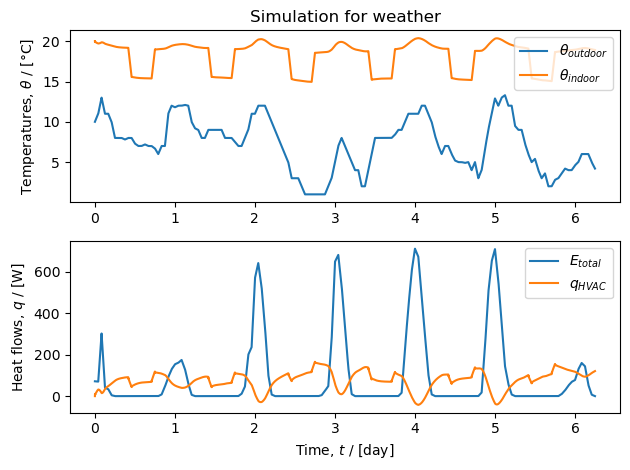

In [19]:
%run Part2controller.py

> Figure 4. Simulation in free-running with weather data using Euler explicit method of integration. a) Indoor and outdoor temperatures. b) Solar and HVAC heat flow rates.

On those graphics, we observe that the indoor temperature is pretty much the same through the 6 days of observations. As we decided, the interior temperature during the day is controlled at 20°C, and is around 15°C during the night. The outdoor temperature is cooler than the interior temperature. The outdoor temperature seems hotter during the day when the Etotal is at its peak of the day. This is why the indoor temperature is warmer half of the day. Otherwise, at night, the outside and inside temperatures are colder when the emissions are non-existant.

### Section 3.2 - Impacts of the chosen period <a class="anchor" id="Section_3.2"></a>

We now want to observe the impacts of the chosen period : winter (december-january) versus summer (july-august) and then the impacts of scheduled auxiliary heat sources. After that, we will see the differences between the system with and without controller. We increase the duration of the period considered from 6 days to 2 months. We won't simulate the system on a longer period because the simulation will take too long to compile.

2000-01-01 00:01:00 	start date
2000-02-28 23:59:59 	end date
dt = 50 s


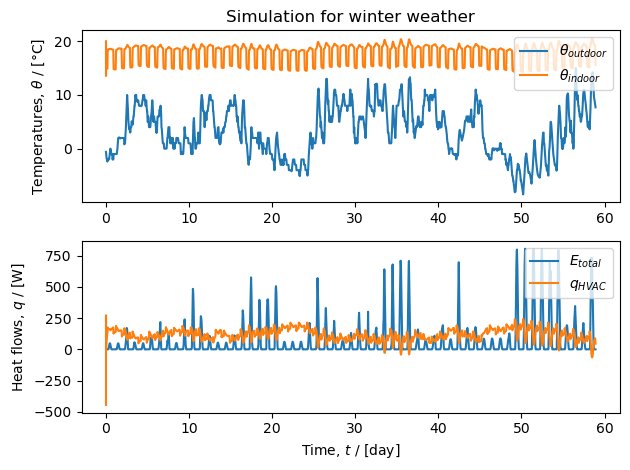

In [22]:
%run Part2winter.py

>Figure 5. Simulation in free-running for winter weather a) Indoor and outdoor temperatures. b) Solar and HVAC heat flow rates.

2000-07-01 00:01:00 	start date
2000-08-31 23:59:59 	end date
dt = 50 s


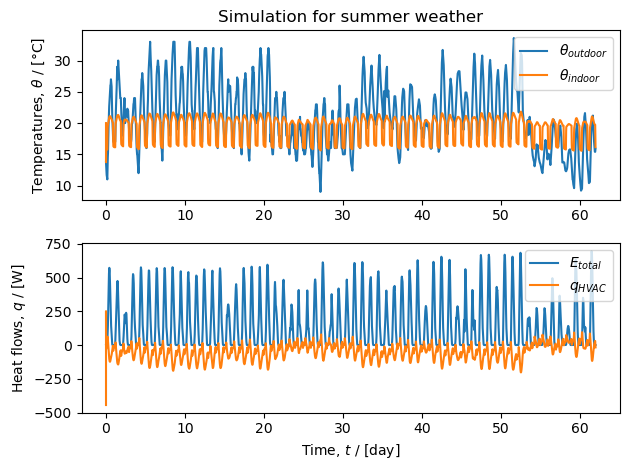

In [24]:
%run Part2summer.py

>Figure 6. Simulation in free-running for summer weather a) Indoor and outdoor temperatures. b) Solar and HVAC heat flow rates.

As we can see in the graphs, the indoor temperature stays the same between 15°C during the night to 20°C during the day. The outdoor temperature is higher than the indoor temperature during the summer and the opposite during the winter.
The indoor temperature stays inside the limits we put during summer and winter, because we active the hvac system which is acting as a controller inside the room. The HVAC system provides thermic energy to the room in the winter to compensate the losses and takes out thermic energy in the room during the summer to compensate the gains. Therefore, the HVAC is positive during winter (heating mode) and negative during summer (climatisation mode).

### Section 3.3 - Schedule the auxiliary heat sources <a class="anchor" id="Section_3.3"></a>

The next section of the project detailed a scenario with people inside the room. In this situation, the room is an office space occupied by a single person. The person is working in this room for a determined time during the day which is between 8AM and 5PM. During those hours, the person uses a computer and activates lights inside to work properly. A person emits around 65W/m2 when it is typing as an activity in an office according to [table 5-1 of ASHRAE 55 2020](https://www.ashrae.org/file%20library/technical%20resources/standards%20and%20guidelines/standards%20addenda/55_2020_b_20210430.pdf). A computer consumes approximately 200W during its operation time which is during work hours. On the other side, during the night, it only consumes [15W](https://energieplus-lesite.be/evaluer/bureautique2/Evaluer-la-consommation-des-equipements/evaluer-la-consommation-des-ordinateurs/?fbclid=IwAR1lOG8yHIUNBO_j38kE9MRzvUfoOfffBHFEi0eJdW3CvNhGY8Ix0mG4FsU). Also, during this time, the person uses some lights that consume 8,8W/m2 according to [table 4.2.1.5. of the National Energy Code of Canada for Buildings 2015](https://publications.gc.ca/collections/collection_2022/cnrc-nrc/NR24-24-1-2015-eng.pdf) which can be use as a reference. 

To transpose this schedule to python code we wrote these lines:

    Qa_day=65*9+8.8*9+200 
    
    Qa_night=15
    
    Qa=np.array([ Qa_day if 6<= hour <= 22 else Qa_night for hour in To.index.hour])

2000-02-01 12:00:00 	start date
2000-02-07 18:00:00 	end date
dt = 50 s


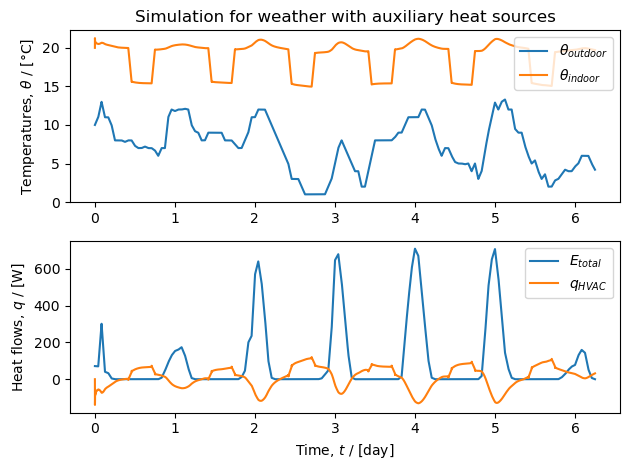

In [25]:
%run Part2controllerheat.py

>Figure 7. Simulation in free-running with auxiliary heat sources a) Indoor and outdoor temperatures. b) Solar and HVAC heat flow rates.

As a reminder, the graph of the inital simulation is:

![summer](Inital_simulation.svg)
> Figure 8. Inital Simulation

It is good to see at the beginning that the interior temperature follows the same curve in both model. Therefore, the HVAC system in both models acts correctly by controlling the temperature as desired. In the model without auxiliary sources, we can see that the heat flows provided by the HVAC system is higher than the model with auxiliary sources during the day. This can be easily explain by the fact that, because the auxiliay sources brings heat inside the room, this reduce the quantity of heat that the HVAC system needs to bring, and therefore the heat flows is lower. This is normal, because we are in winter conditions, so the HVAC system brings heat inside.

### Section 3.4 - Impact of the controller <a class="anchor" id="Section_3.4"></a>

In this section, we will now assess the impact of having or not a controller on the interior temperature and on the heat flows of the HVAC system. To do this, we will examine both summer and winter conditions of the system. It is important to mention that in this scenario, the auxiliary sources are integrated into the models.

#### Section 3.4.1 - Winter <a class="anchor" id="Section_3.4.1"></a>

dt = 50 s
dt = 300 s = 5.0 min


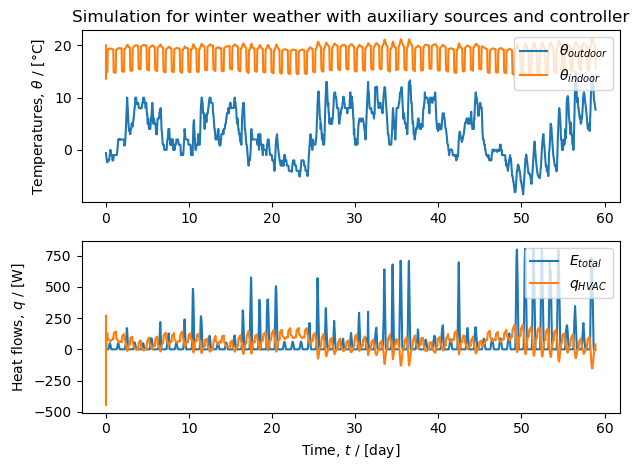

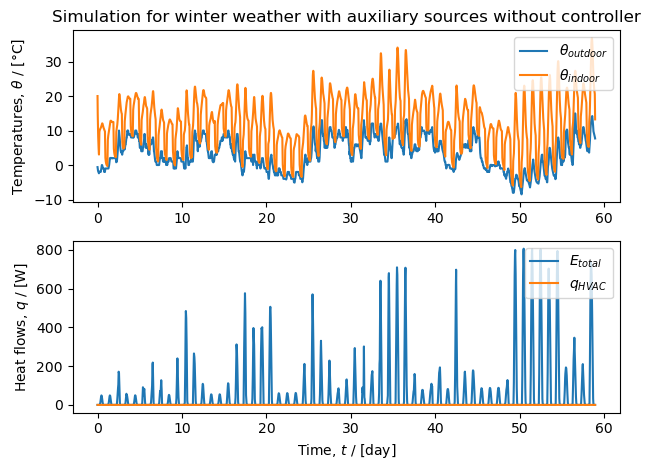

In [28]:
%run Part2winternocontrol.py

>Figure 9. Simulation for winter weather with auxiliary heat sources and controller a) Indoor and outdoor temperatures. b) Solar and HVAC heat flow rates.

>Figure 10. Simulation for winter weather with auxiliary heat sources without controller a) Indoor and outdoor temperatures. b) Solar and HVAC heat flow rates.

**WINTER CONDITIONS - CONTROLLED MODEL:**

For the controlled model with the winter conditions, we can start by seeing that the interior temperature varies each day from 20°C during the day to 15°C during the night. This is normal, because the definition of having a controller is to decide what temperature you want inside your room. Therefore, the fact that the temperature is stable means that it is controlled by a thermostat by example. We can also see that the exterior temperature is inferior to the interior temperature. This is completely normal, and this represents, like in our case, winter conditions.

For the heat flows, we can see that, because the model is controlled, the HVAC system has a heat flow, because the HVAC has the objective to stabilize the temperature to the one designated. In this case, because we are in winter conditions, and therefore we are losing, often but not always like we can see, more thermic energy from conduction through the walls and the window than we are gaining thermic energy from the auxiliary sources and from the sun, the HVAC system needs to compensate this lost by providing thermic energy inside the room. That is why the heat flow is in majority positive, and so we call that heating.

**WINTER CONDITIONS - UNCONTROLLED MODEL:**

For the uncontrolled model with the winter conditions, we can start by seeing that the interior temperature varies a lot during the simulation. This is normal, because the interior temperature is not fixed by a controller, so it can vary according to the losses and the gains in thermic energy from the different sources. We can also see that the exterior temperature is inferior to the interior temperature. This is completely normal, because the auxiliary sources, like the person working or the computer running, gives up heat in the room.

For the heat flows, we can see that, because the model is uncontrolled, the HVAC system has no heat flow. This is explained by the fact that because the objective of the HVAC is to stabilize the temperature to the one designated by the controller. Therefore, where there is no controller, the temperature, like we analysed before, can vary and the HVAC system is not used.

**CONCLUSION/COMPARAISON:**

In conclusion, the fact of putting a controller on the interior temperature allow us to have a constant temperature during the day and the night. This is done by having a HVAC system that provides or removes thermic energy in the model to keep the temperature needed. Finally, we can see that in both model, the Etotal from the sun is the same, because this is independent from the fact that the temperature is controlled or not.

#### Section 3.4.2 - Summer <a class="anchor" id="Section_3.4.2"></a>

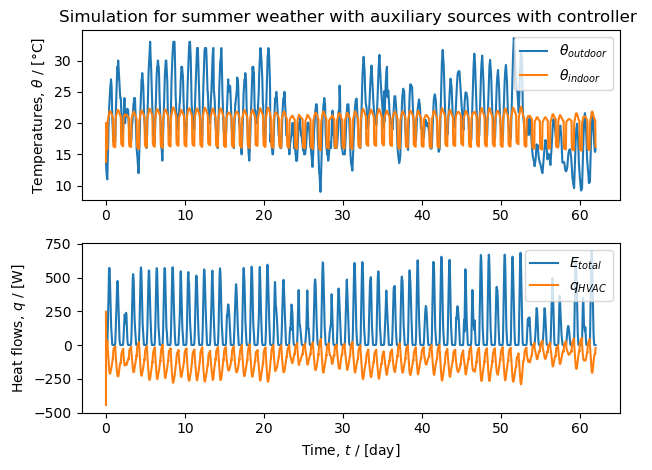

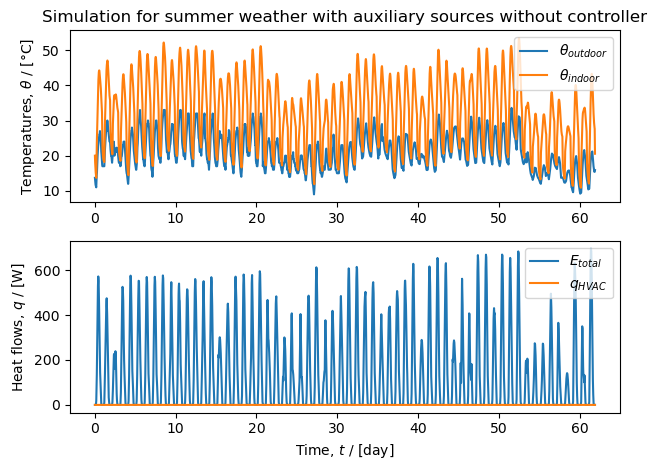

In [31]:
%run Part2summernocontrol.py

>Figure 11. Simulation for summer weather with auxiliary heat sources and controller a) Indoor and outdoor temperatures. b) Solar and HVAC heat flow rates.

>Figure 12. Simulation for summer weather with auxiliary heat sources without controller a) Indoor and outdoor temperatures. b) Solar and HVAC heat flow rates.

**SUMMER CONDITIONS - CONTROLLED MODEL :**

For the controlled model with the summer conditions, we can start by seeing that the interior temperature varies each day from 22°C during the day to 16°C during the night. This is normal, because the definition of having a controller is to decide what temperature you want inside your room. Therefore, the fact that the temperature is stable means that it is controlled by a thermostat by example. We can also see that the exterior temperature is superior to the interior temperature. This is completely normal, and this represents, like in our case, summer conditions.

For the heat flows, we can see that, because the model is controlled, the HVAC system has a heat flow, because the HVAC has the objective to stabilize the temperature to the one designated. In this case, because we are in summer conditions, and therefore we are gaining, often but not always like we can see, more thermic energy inside the room than we are losing outside the room, the HVAC system need to compensate this gain by extracting thermic energy inside the room. This is done by evacuating inside air that is hot and replacing it by air that has been cooled down. That is why the heat flows is in majority negative, and so we call that climatisation.

**SUMMER CONDITIONS - UNCONTROLLED MODEL:**

For the uncontrolled model with the summer conditions, we can start by seeing that the interior temperature varies a lot during the simulation. This is normal, because the interior temperature is not fixed by a controller, so it can vary according to the loses and the gains in thermic energy from the different sources. We can also see that the exterior temperature is inferior to the interior temperature. This is completely normal, because the auxiliary sources, like the person working or the computer running, gives up heat in the room.

For the heat flows, we can see that, because the model is uncontrolled, the HVAC system has no heat flows. This is explained by the fact that because the objective of the HVAC is to stabilize the temperature to the one designated by the controller. Therefore, where there is no controller, the temperature, like we analyzed before, can vary and the HVAC system is not use.

**CONCLUSION/COMPARAISON:**

In conclusion, the fact of putting a controller on the interior temperature allow us to have a constant temperature during the day and the night. This is done by having a HVAC system that provide or remove thermic energy in the model to keep the temperature needed. Finally, we can see that in both model, the Etotal from the sun is the same, because this is independent from the fact that the temperature is controlled or not.

## Conclusion <a class="anchor" id="Conclusion"></a>

To conclude, this project aimed us to understand the influence of various parameters on the response of our simple initial model.  

Firstly, we tried to understand how both the settling time and the time step are influenced by those parameters as the width of insulation, the length of the walls or the neglected capacities of glass and air. We observed for example that when the width of insulation is increased, the settling time also is increased. This result shows that the response time of the model is modified. This phenomenon is called thermal inertia. Thus, it can permit to use less cooling system in summer as the building will take more time to be heated by the outdoor temperature.  

Then, we add the inputs to our model in order to analyze the impacts of the chosen period (summer or winter), the auxiliary heat sources and the controller on the results of the simulation. We have shown that in winter the HVAC system needs to provide energy to compensate the losses and that in summer it needs to take out the heat to compensate the gains. The HVAC is acting as a controller inside our building to maintain the interior temperature wanted. What’s more, the auxiliary heat sources provide heat energy inside the room, so the HVAC needs to compensate less in winter. Finally, the controller (the HVAC system in our case) lets us keep a constant indoor temperature during day and night by compensating gains or losses depending on the period.  

This project was a good way to create our own “home-made” code to understand better how the professional softwares work. We learned also how to code in the python language and how to make a notebook that is humanly readable. It could be useful to make reports in our future professional works.  

## List of references <a class="anchor" id="References"></a>